In [1]:
from pyMeasure import *

Importing pyMeasure, this should take roughly 30 seconds
The module smithplot was not found,please put it on the python path
The module smithplot was not found,please put it on the python path


In [2]:
new_vna=VNA("GPIB::17")

The information sheet was not found defaulting to address


In [3]:
new_vna.initialize()

In [4]:
new_vna.get_IFBW()

35000.0

In [5]:
s2p=new_vna.measure_sparameters()

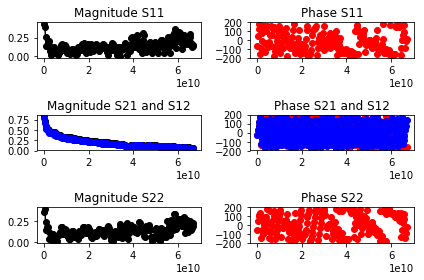

In [7]:
s2p.show();

In [12]:
new_vna.write("CALC:FORM MLOG")

(16L, <StatusCode.success: 0>)